<h1 align="center"> MACHINE LEARNING </h1>


**Project :** Credit Card Fraud Detection With Machine Learning



<h1 align="center"> PLAN   </h1>

<h2>INTRODUCTION</h2>

I. <b>PREMIER CONTACT</b><br>
a) [Importation](#debut)<br>
b) [Visualisation](#1)<br><br>
....  i) [Rapport Résumé avec Pandas-Profiling ](#pp)<br><br>
....  ii) [Matrices de Correlation](#2)<br><br>
c) [Test des Modèles](#3)<br><br>
....  i) [Random Forest](#4)<br><br>
.......     -) [Interpretation du Random Forest](#5)<br><br>
  ii) [SVM](#6)<br><br>
.......     -) [Interpretation du SVM](#7)<br><br>
....  iii) [Reseau de Neurones](#8)<br><br>
.......     -) [Interpretation du Reseau de Neurones](#9)<br><br>
<b>Conclusion  Partielle</b><br>  

II. <b>PREPROCESSING</b><br>
a) [Séparation et Visualisation](#10)<br>
b) [Scaling](#12)<br><br>

III) <b>Sur-échantillonnage avec imblearn</b><br>
A. [Fitting model](#fm)</b><br>
.... a) [Random Forest](#15)<br>
.... b) [SVM](#16)<br>
.... c) [RESEAU DE NEURONES](#17)<br>


IV. <b>Sous-echantillonage</b><br>
A) [Normalisation de notre données d'entrainement](#19)<br>
B) [Application des modèles](#20)<br>
.... a) [Random Forest](#21)<br>
.... b) [SVM](#22)<br>
.... c) [RESEAU DE NEURONES](#23)<br>

<h2>CONCLUSION </h2>


-------------------------------------------------------------------------------------------------------------------------------

<h1 align="center"> INTRODUCTION  </h1>
<a id="debut"></a>

# I.  PREMIER CONTACT

## Importation
<a id="debut"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from visualization import viz_data
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dt = pd.read_csv('/content/drive/MyDrive/Fraud Card detection /creditcard.csv')

In [4]:
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Rapport Résumé avec Pandas-Profiling
<a id="pp"></a>

In [5]:

# from pandas_profiling import profile_report# permet de faire l'analyse exploratoire des données
# dt_report=dt.profile_report()
# dt_report

In [6]:
#dt.describe().T

## Visualisation
<a id="1"></a>

### Matrices de Correlation  
<a id="2"></a>

La représentation des matrices de corrélation est une étape inspensable à la compréhension de nos données. Nous voulons savoir s'il existe des caractéristiques qui influencent le plus sur le fait qu'une transaction soit une fraude ou non.


## Test des Modèles
<a id="3"></a>

In [7]:
# Séparation des features et du Target
feature = dt.iloc[:, 0:30].columns
ft = dt[feature]
target = dt.iloc[:1, 30: ].columns
tg = dt[target]
#print(ft),print(tg)

In [8]:
tg.value_counts()

Class
0        284315
1           492
dtype: int64

In [9]:
# Split de nos données
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(ft,tg,test_size=0.2,random_state=42)

## PREPROCESSING
<a id="10"></a>

## Séparation et Visualisation
<a id="11"></a>

In [10]:
# Separating feature and targer of the dataset
feature = dt.iloc[:, 0:30].columns
ft = dt[feature]


In [11]:
#ft.describe()

In [12]:
target = dt.iloc[:1, 30: ].columns
tg = dt[target]


In [13]:
# # visualisation de la variable Class
# cl= sns.countplot(dt['Class'])
# cl.set_xticklabels(['Pas de Fraude','Fraude'])
# plt.show()

In [14]:
# Séparation des Class==1 et class==0
Fraude = dt[dt['Class']==1]

Pas_Fraude = dt[dt['Class']==0]

print('La taille des Fraudes: ',Fraude.shape)
print('La taille des  Pas-Fraudes: ',Pas_Fraude.shape)

La taille des Fraudes:  (492, 31)
La taille des  Pas-Fraudes:  (284315, 31)


## Scaling
<a id="12"></a>

En lisant la matrice de Corrélation obtenue dans la section précedente, on peut envisager de 'Time' et 'Amount' afin de les amener au même echelle que les autres colonnes. Ainsi nous utiliserons "RoustScaler" de la librairie "slearn.preprocessing" parcequ'il est plus tolérant aux outliers

In [15]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

# Sur-échantillonnage avec imblearn
<a id="13"></a>

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
sample=RandomOverSampler()

In [18]:
X_train_samp, y_train_samp = sample.fit_resample(X_train,y_train )

In [19]:
X_train_samp.shape, y_train_samp.shape

((454902, 30), (454902, 1))

## Fitting model
<a id="fm"></a>

### Random Forest
<a id="15"></a>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [21]:
model=RandomForestClassifier(40)
model.fit(X_train_samp,y_train_samp)

RandomForestClassifier(n_estimators=40)

Confusion Matrix
     train:y=0  train:y=1  test:y=0  test:y=1
y=0     227451          0     56862         2
y=1          0     227451        22        76 


[[227451      0]
 [     0 227451]]


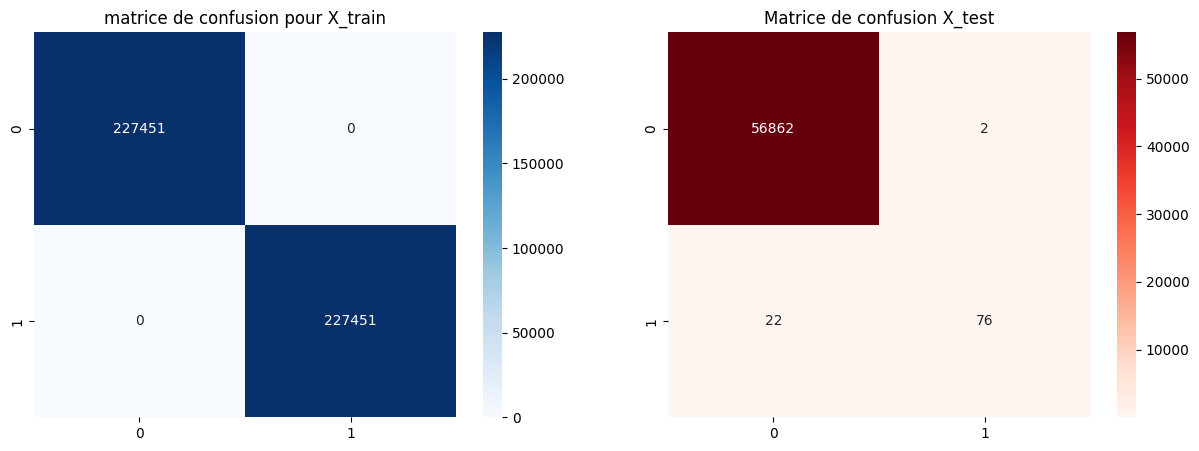

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:

pred1 = model.predict(X_train_samp)
c_train = confusion_matrix(y_train_samp, pred1)
pred = model.predict(X_test)
c_test = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(pd.DataFrame(np.hstack([c_train, c_test]), index=["y=0", "y=1"],
                            columns="train:y=0 train:y=1 test:y=0 test:y=1".split()), "\n\n")


print(c_train)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(c_train,annot=True,cmap='Blues',fmt='0')
plt.title('matrice de confusion pour X_train')

plt.subplot(1,2,2)
sns.heatmap(c_test,annot=True,cmap='Reds',fmt='0',xticklabels='auto',
    yticklabels='auto')
plt.title('Matrice de confusion X_test')
plt.show()
print(classification_report(y_test, pred))
sns.heatmap
plt.show()

**Ici le Random Forest a appris à 100% . Par ailleur sur les données test, le modèle a détecté presque la totalité des non fraudes et 76,53% des fraudes**

### SVM
<a id="16"></a>

In [23]:
from sklearn.svm import SVC

In [24]:
SVM=SVC(C=1.0, kernel='linear')

In [ ]:
SVM.fit(X_train_samp, y_train_samp)

In [ ]:

pred1 = SVM.predict(X_train_samp)
c_train = confusion_matrix(y_train_samp, pred1)
pred = SVM.predict(X_test)
c_test = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(pd.DataFrame(np.hstack([c_train, c_test]), index=["y=0", "y=1"],
                            columns="train:y=0 train:y=1 test:y=0 test:y=1".split()), "\n\n")


print(c_train)
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.heatmap(c_train,annot=True,cmap='Blues',fmt='0')

plt.subplot(1,2,2)
sns.heatmap(c_test,annot=True,cmap='Reds',fmt='0',xticklabels='auto',
    yticklabels='auto')
plt.show()
print(classification_report(y_test, pred))
sns.heatmap

### RESEAU DE NEURONES
<a id="17"></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
# Initialisation du reseau
network = Sequential()

# Ajout de la couche d'entree et de la 1ere couche cachee
network.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Ajout de la 2eme couche cachee
network.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Ajout de la couche de sortie
network.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Fitting the ANN to the Training set
#network.fit(X_train_samp, y_train_samp, batch_size = 10, epochs = 5)


In [ ]:
network.summary()

In [ ]:
network.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
network.fit(X_train_samp,y_train_samp,batch_size=10,epochs=10)

In [ ]:
loss,score=network.evaluate(X_test,y_test)
print("score: ",score)

In [ ]:

pred1 = network.predict_classes(X_train_samp)
c_train = confusion_matrix(y_train_samp, pred1)
pred = network.predict_classes(X_test)
c_test = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(pd.DataFrame(np.hstack([c_train, c_test]), index=["y=0", "y=1"],
                            columns="train:y=0 train:y=1 test:y=0 test:y=1".split()), "\n\n")


print(c_train)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(c_train,annot=True,cmap='Blues',fmt='0')

plt.subplot(1,2,2)
sns.heatmap(c_test,annot=True,cmap='Reds',fmt='0',xticklabels='auto',
    yticklabels='auto')
plt.show()
print(classification_report(y_test, pred))
sns.heatmap
plt.show()

**Dans le cas de sur-échantillonnage, le réseau de neuronne a très bien appris et sur les données test, le modèle a détecté 87.8% des fraudes.**

<h1 align="center"> CONCLUSION </h1>

En résumé, le Random Forest est le modèle qui est a le plus fort taux de prédiction malgré le déséquilibre des classes dans les
données. Il est donc le modèle le plus adapté pour ce type de données. La technique d'équilibrage des données (oversampling et undersampling) a nettement  améliorer la détection des ces fraudes bien que en utilisant oversampling, on trouve que la taille des données double et le SVM met plus temps à s'executer.
